# Results of deepfakemetry on various POI

## Imports

In [1]:
import os
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt 

## Reading CSVs

In [2]:
poi = 'Obama'
path2resfolder = r'\\medias\db\ImagingSecurity_misc\libourel\behaviour_detection\poi-forensics\app_code\output'
positive_csv = os.path.join(path2resfolder, r'REALOBAMA__2__OBAMA\res.csv')
negative_csv = os.path.join(path2resfolder, r'FAKEOBAMA__2__OBAMA\res.csv')

In [3]:
df_pos = pd.read_csv(positive_csv)
df_neg = pd.read_csv(negative_csv)

df_pos["is_poi"] = 1
df_neg["is_poi"] = 0

Merge positive and negative csv CSVs

In [4]:
df_res = pd.concat([df_pos, df_neg], axis=0)
df_res = df_res.dropna()

In [5]:
nb_pos, nb_neg = len(df_res[df_res.is_poi==1]), len(df_res[df_res.is_poi==0])
print(f"Number of positive sample (poi driving the deepfake): {nb_pos} videos")
print(f"Number of negative sample (other driving the deepfake): {nb_neg} videos")

Number of positive sample (poi driving the deepfake): 29 videos
Number of negative sample (other driving the deepfake): 517 videos


In [6]:
df_res[df_res.is_poi == 0].head(3)

,video_path,distance,is_poi
0,/medias/db/ImagingSecurity_misc/libourel/behav...,1.079114,0
1,/medias/db/ImagingSecurity_misc/libourel/behav...,1.724486,0
2,/medias/db/ImagingSecurity_misc/libourel/behav...,0.795993,0


Clean the video_path column

In [7]:
df_res.video_path = df_res.video_path.apply(os.path.basename)

In [8]:
df_res.head(3)

,video_path,distance,is_poi
0,079_part_1 [0.33 - 29.53].mp4,0.319911,1
1,081_part_2 [26.23 - 121.69].mp4,0.294147,1
2,081_part_1 [6.41 - 26.19].mp4,0.377131,1


## Compute metrics

In [9]:
fpr, tpr, thresholds = metrics.roc_curve(df_res.is_poi, -df_res.distance)
auc = metrics.auc(fpr, tpr)
print(f"AUC of deepfakemetry for {poi} is {auc}.")

AUC of deepfakemetry for Obama is 0.8980190755685986.


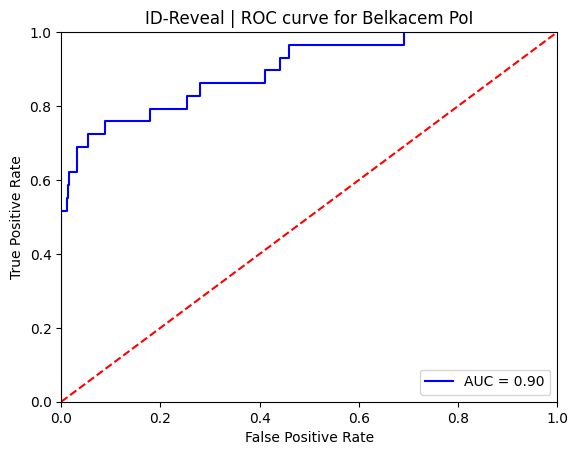

In [10]:
plt.title('ID-Reveal | ROC curve for Belkacem PoI')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Run experiment on all POIs

The following section performs POI-deepfake detection + deepfakemetry on 3 POIs (Belkacem, Obama, and Trump).

In [11]:
def generateDataFrame(path2resfolder, poi, POI4PATH, mode):
    if mode == 'poi-df-detection':
        positive_csv = os.path.join(path2resfolder, f'REAL{POI4PATH}__2__{POI4PATH}\\res.csv')
        negative_csv = os.path.join(path2resfolder, f'FAKE{POI4PATH}__2__{POI4PATH}\\res.csv')
    elif mode == 'deepfakemetry':
        positive_csv = os.path.join(path2resfolder, f'd{POI4PATH}_sCDF__2__{POI4PATH}\\res.csv')
        negative_csv = os.path.join(path2resfolder, f'dCDF_sCDF__2__{POI4PATH}\\res.csv')
    
    df_pos = pd.read_csv(positive_csv)
    df_neg = pd.read_csv(negative_csv)

    df_pos["is_poi"] = 1
    df_neg["is_poi"] = 0

    df_res = pd.concat([df_pos, df_neg], axis=0)
    df_res = df_res.dropna()

    nb_pos, nb_neg = len(df_res[df_res.is_poi==1]), len(df_res[df_res.is_poi==0])
    print(f"[{mode}] [{poi}]")
    print(f"Number of positive sample : {nb_pos} videos")
    print(f"Number of negative sample : {nb_neg} videos")

    fpr, tpr, thresholds = metrics.roc_curve(df_res.is_poi, -df_res.distance)
    auc = metrics.auc(fpr, tpr)
    print(f"AUC = {auc}")
    return auc, df_res, fpr, tpr

[poi-df-detection] [Belkacem]
Number of positive sample : 131 videos
Number of negative sample : 516 videos
AUC = 0.9015030475176047
[deepfakemetry] [Belkacem]
Number of positive sample : 129 videos
Number of negative sample : 534 videos
AUC = 0.5167813488952762
[poi-df-detection] [Obama]
Number of positive sample : 29 videos
Number of negative sample : 517 videos
AUC = 0.8980190755685986
[deepfakemetry] [Obama]
Number of positive sample : 29 videos
Number of negative sample : 534 videos
AUC = 0.5526281802918764
[poi-df-detection] [Trump]
Number of positive sample : 30 videos
Number of negative sample : 519 videos
AUC = 0.8827874116891458
[deepfakemetry] [Trump]
Number of positive sample : 30 videos
Number of negative sample : 534 videos
AUC = 0.6100499375780275


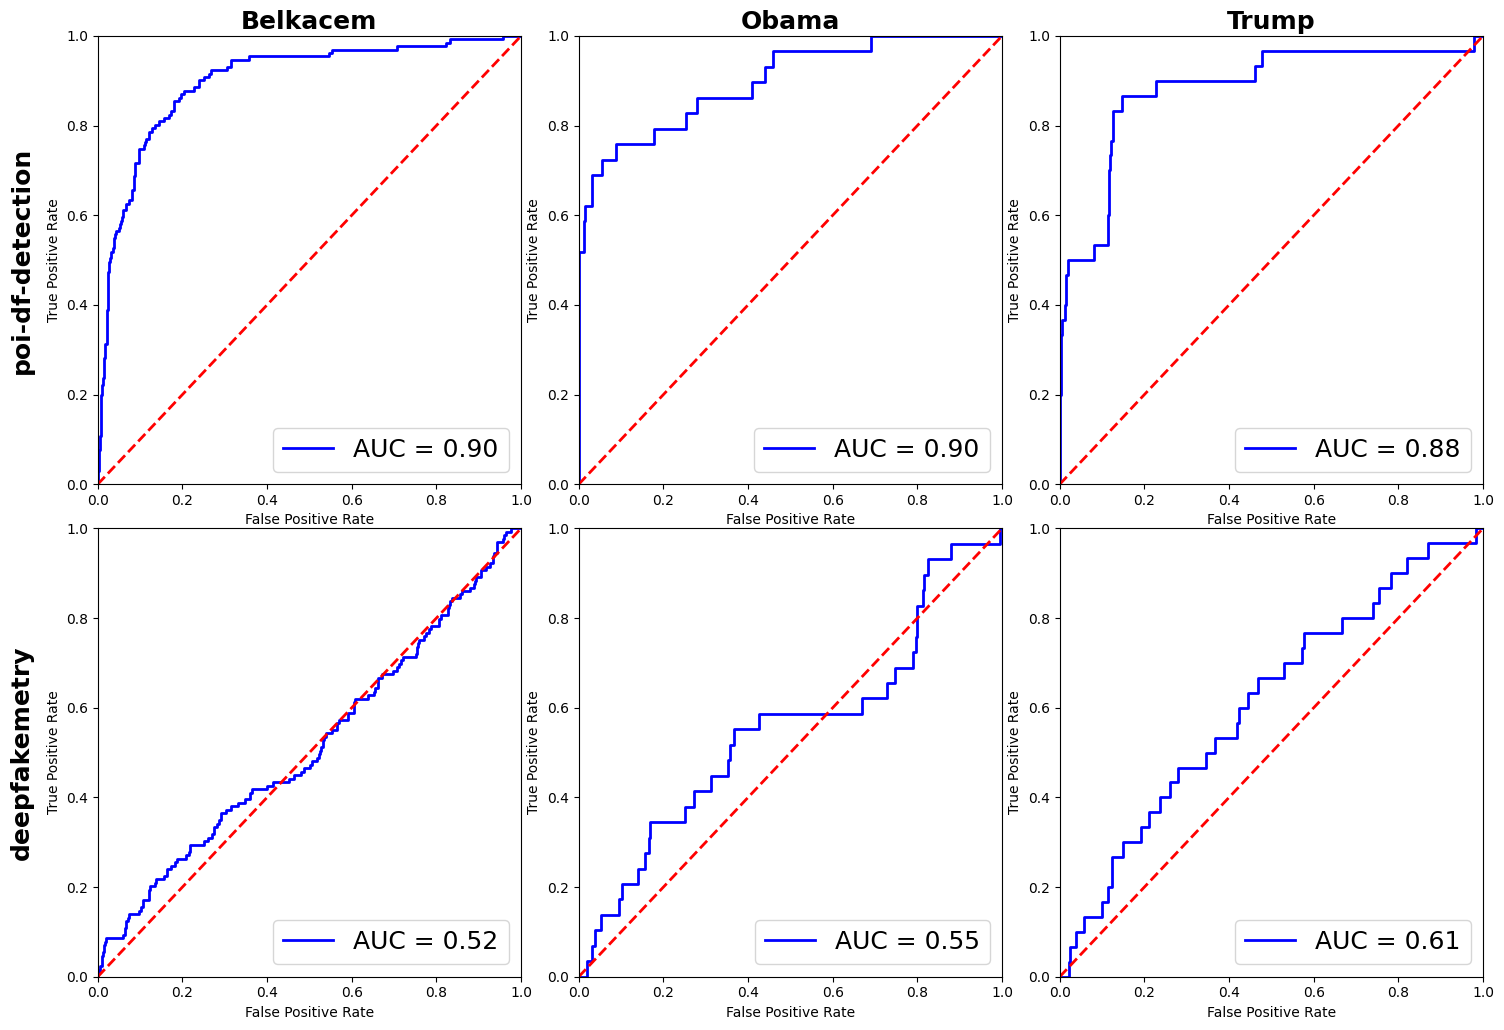

In [23]:
poi_list = ['Belkacem', 'Obama', 'Trump']
poi_filenames = {'Belkacem' : 'BELKACEM', 'Obama': 'OBAMA', 'Trump': 'TRUMP'}

pad = 5 # in points
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes[:,0][0].annotate('poi-df-detection', xy=(0, 0.5), xytext=(-axes[:,0][0].yaxis.labelpad - pad, 0),
                xycoords=axes[:,0][0].yaxis.label, textcoords='offset points', ha='right', va='center', fontweight='bold', fontsize=18, rotation=90)
axes[:,0][1].annotate('deepfakemetry', xy=(0, 0.5), xytext=(-axes[:,0][1].yaxis.labelpad - pad, 0),
                xycoords=axes[:,0][1].yaxis.label, textcoords='offset points', ha='right', va='center', fontweight='bold', fontsize=18, rotation=90)
fig.tight_layout()
col = 0
for poi in poi_list:
    row = 0
    axes[0][col].annotate(poi, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points', ha='center', va='baseline', fontweight='bold', fontsize=18)
    for mode in ['poi-df-detection', 'deepfakemetry']:
        auc, df, fpr, tpr = generateDataFrame(path2resfolder, poi, poi_filenames[poi], mode)
        axes[row, col].plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc, linewidth=2)
        axes[row, col].legend(loc = 'lower right', fontsize=18)
        axes[row, col].plot([0, 1], [0, 1],'r--', linewidth=2)
        axes[row, col].set_xlim([0, 1])
        axes[row, col].set_ylim([0, 1])
        axes[row, col].set_ylabel('True Positive Rate')
        axes[row, col].set_xlabel('False Positive Rate')

        row += 1
        
    col += 1


plt.show()